In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns 
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("../Ficheiros/train.csv")
df_mod = pd.read_csv("../Ficheiros/train.csv")

In [41]:
# Substitua as outras marcas por "Outra marca"
top_three = df_mod["brand"].value_counts().index[:4]
brand = df_mod["brand"].apply(lambda x: "Outra" if x not in top_three else x)
df_mod.insert(1,"Brand_Mod", brand)

C:\Users\gonca\AppData\Local\Temp\ipykernel_15492\3469545444.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(str(brands[i]), (brands.index[i], brands[i]))


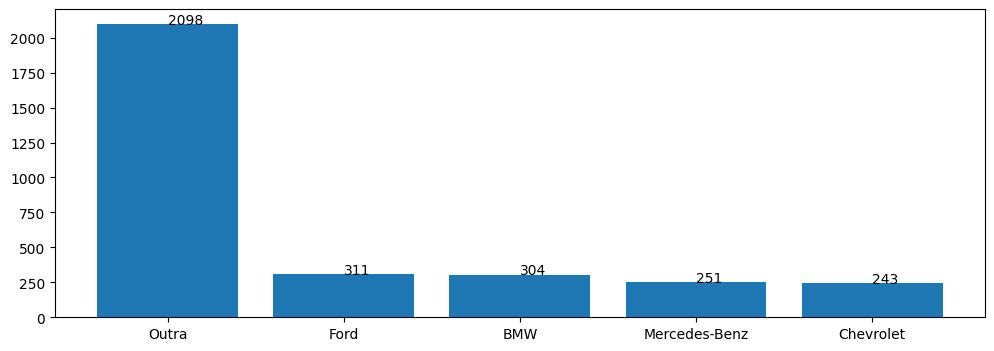

In [42]:
# Obter os 10 valores mais frequentes
brands = df_mod['Brand_Mod'].value_counts()

# Criar um gráfico de barras
plt.figure(figsize=(12, 4))
plt.bar(brands.index, brands)

for i in range(len(brands)):
    plt.annotate(str(brands[i]), (brands.index[i], brands[i]))

plt.show()

In [43]:
df_mod['milage'] = df_mod['milage'].str.split(" ", expand = True)[0].str.replace(',', '').astype('int')

In [44]:
df_mod["KM"] = df_mod["milage"] * 1.609344
df_mod["KM"] = df_mod["KM"].round().astype(int)
df_mod.head()

,brand,Brand_Mod,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,KM
0,Jeep,Outra,Wrangler Sport,2014,71000,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,22000,114263
1,Toyota,Outra,Highlander XLE,2015,68575,Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,26000,110361
2,Toyota,Outra,Camry Hybrid XLE,2018,69641,Hybrid,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,23995,112076
3,Subaru,Outra,Outback Touring XT,2021,33500,Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Blue,Brown,None reported,Yes,34000,53913
4,Lexus,Outra,GX 460 Base,2018,75000,Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,38095,120701


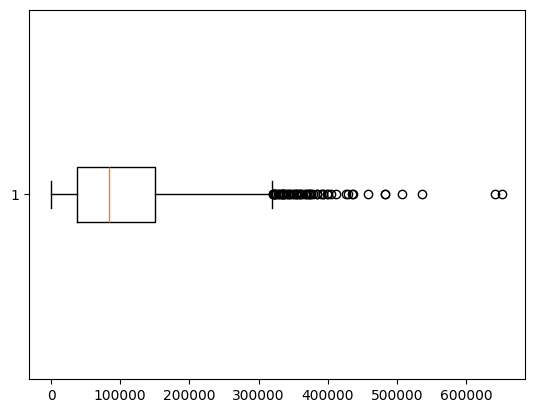

In [45]:
plt.boxplot(df_mod['KM'], vert=False)

plt.show()

In [46]:
df_mod['fuel'] = df_mod['fuel_type'].fillna('Outro')
df_mod.loc[df_mod['fuel'].str.contains('–'), 'fuel'] = 'Outro'
df_mod.loc[df_mod['fuel'] == 'not supported', 'fuel'] = 'Outro'

C:\Users\gonca\AppData\Local\Temp\ipykernel_15492\330295251.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(str(milhas[i]), (milhas.index[i], milhas[i]))


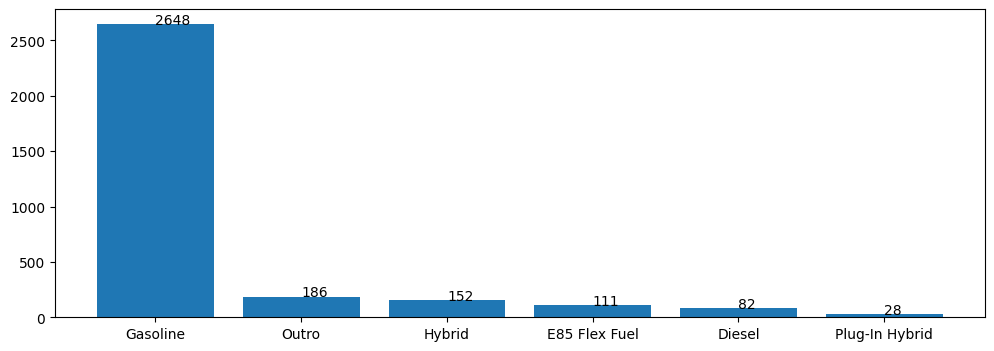

In [47]:
# Obter os 10 valores mais frequentes
milhas = df_mod['fuel'].value_counts()

# Criar um gráfico de barras
plt.figure(figsize=(12, 4))
plt.bar(milhas.index, milhas)

for i in range(len(milhas)):
    plt.annotate(str(milhas[i]), (milhas.index[i], milhas[i]))

plt.show()

In [48]:
# Define a function to extract the desired values
def extract_engine_details(engine_string):
    parts = engine_string.split(" ")
    
    horse_power = None
    cc = None
    cylinder = None
    
    for part in parts:
        if 'HP' in part:
            horse_power = part
        elif 'L' in part:
            cc = part
        elif part.isdigit() or (part.startswith('V') and part[1:].isdigit()):
            cylinder = part
            
        if 'Liter' in part:
            cc = None

    return pd.Series({
        "HP": horse_power,
        "Litros": cc,
        "Cilindros": cylinder
    })

# Convert the engine column to string type
df_mod["engine"] = df_mod["engine"].astype(str)

# Extract engine details for each row
df_mod[["HP", "Litros", "Cilindros"]] = df_mod["engine"].apply(extract_engine_details)

df_mod.drop('engine', axis=1, inplace=True) 

# Display the resulting DataFrame
print(df_mod.to_string())

              brand      Brand_Mod                                                    model  model_year  milage       fuel_type                                                      transmission                                  ext_col                    int_col                                accident clean_title    price      KM            fuel        HP Litros Cilindros
0              Jeep          Outra                                           Wrangler Sport        2014   71000        Gasoline                                                       5-Speed A/T                                     Gray                      Black                           None reported         Yes    22000  114263        Gasoline   285.0HP   3.6L        V6
1            Toyota          Outra                                           Highlander XLE        2015   68575        Gasoline                                                               A/T                                   Silver                  

In [49]:
df_mod.head()

,brand,Brand_Mod,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,KM,fuel,HP,Litros,Cilindros
0,Jeep,Outra,Wrangler Sport,2014,71000,Gasoline,5-Speed A/T,Gray,Black,None reported,Yes,22000,114263,Gasoline,285.0HP,3.6L,V6
1,Toyota,Outra,Highlander XLE,2015,68575,Gasoline,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,26000,110361,Gasoline,270.0HP,3.5L,V6
2,Toyota,Outra,Camry Hybrid XLE,2018,69641,Hybrid,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,23995,112076,Hybrid,208.0HP,2.5L,4
3,Subaru,Outra,Outback Touring XT,2021,33500,Gasoline,CVT Transmission,Blue,Brown,None reported,Yes,34000,53913,Gasoline,260.0HP,2.4L,4
4,Lexus,Outra,GX 460 Base,2018,75000,Gasoline,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,38095,120701,Gasoline,301.0HP,4.6L,8


In [50]:
# Remove ".0HP" suffix from the "horse_power" column
df_mod["HP"] = df_mod["HP"].str.replace(".0HP", "")

# Convert "horse_power" column to integer, handle non-numeric values with errors='coerce'
df_mod["HP"] = pd.to_numeric(df_mod["HP"], errors='coerce').astype("Int64")

In [51]:
# Remove ".0HP" suffix from the "horse_power" column
df_mod["Cilindros"] = df_mod["Cilindros"].str.replace("V", "")

# Convert "horse_power" column to integer, handle non-numeric values with errors='coerce'
df_mod["Cilindros"] = pd.to_numeric(df_mod["Cilindros"], errors='coerce').astype("Int64")

In [52]:
# Remove ".0HP" suffix from the "horse_power" column
df_mod["Litros"] = df_mod["Litros"].str.replace("L", "")

# Convert "horse_power" column to integer, handle non-numeric values with errors='coerce'
df_mod["Litros"] = pd.to_numeric(df_mod["Litros"], errors='coerce').astype("float")

In [53]:
df_mod.head()

,brand,Brand_Mod,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,KM,fuel,HP,Litros,Cilindros
0,Jeep,Outra,Wrangler Sport,2014,71000,Gasoline,5-Speed A/T,Gray,Black,None reported,Yes,22000,114263,Gasoline,285,3.6,6
1,Toyota,Outra,Highlander XLE,2015,68575,Gasoline,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,26000,110361,Gasoline,270,3.5,6
2,Toyota,Outra,Camry Hybrid XLE,2018,69641,Hybrid,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,23995,112076,Hybrid,208,2.5,4
3,Subaru,Outra,Outback Touring XT,2021,33500,Gasoline,CVT Transmission,Blue,Brown,None reported,Yes,34000,53913,Gasoline,260,2.4,4
4,Lexus,Outra,GX 460 Base,2018,75000,Gasoline,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,38095,120701,Gasoline,301,4.6,8


In [54]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         3207 non-null   object 
 1   Brand_Mod     3207 non-null   object 
 2   model         3207 non-null   object 
 3   model_year    3207 non-null   int64  
 4   milage        3207 non-null   int32  
 5   fuel_type     3060 non-null   object 
 6   transmission  3207 non-null   object 
 7   ext_col       3207 non-null   object 
 8   int_col       3207 non-null   object 
 9   accident      3118 non-null   object 
 10  clean_title   2740 non-null   object 
 11  price         3207 non-null   int64  
 12  KM            3207 non-null   int32  
 13  fuel          3207 non-null   object 
 14  HP            2578 non-null   Int64  
 15  Litros        2891 non-null   float64
 16  Cilindros     2705 non-null   Int64  
dtypes: Int64(2), float64(1), int32(2), int64(2), object(10)
memory usage: 4

In [55]:
df_mod.loc[df_mod['transmission'].str.contains('CVT'), 'transmission_mod'] = 'CVT'
df_mod.loc[df_mod['transmission'].str.contains('automatic|Automatic|A/T|AT|Auto'), 'transmission_mod'] = 'Automatic'
df_mod.loc[df_mod['transmission'].str.contains('M/T|Manual|Mt'), 'transmission_mod'] = 'Manual'
df_mod.loc[df_mod['transmission'].str.contains('Dual Shift Mode'), 'transmission_mod'] = 'DCT'
df_mod.loc[df_mod['transmission_mod'].str.contains('nan'), 'transmission_mod'] = 'Outras'
df_mod['transmission_mod'].fillna('Outras')

0       Automatic
1       Automatic
2             CVT
3             CVT
4       Automatic
          ...    
3202    Automatic
3203    Automatic
3204    Automatic
3205    Automatic
3206       Manual
Name: transmission_mod, Length: 3207, dtype: object

C:\Users\gonca\AppData\Local\Temp\ipykernel_15492\2786633867.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(str(transmission[i]), (transmission.index[i], transmission[i]))


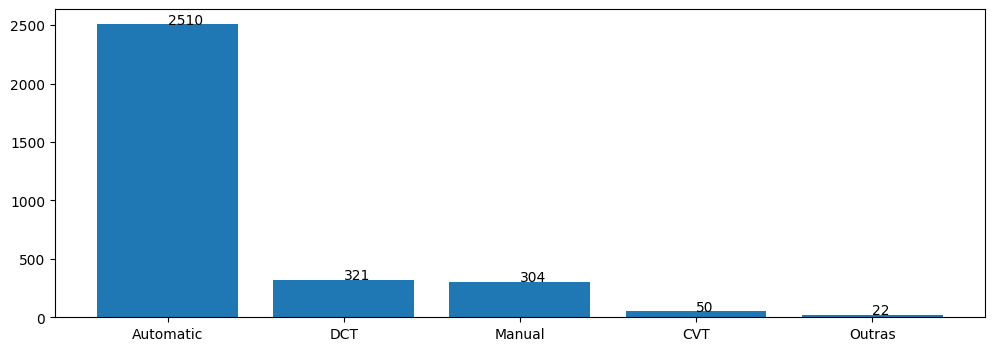

In [56]:
# Obter os 5 valores mais frequentes

transmission = df_mod['transmission_mod'].value_counts()

# Criar um gráfico de barras
plt.figure(figsize=(12, 4))
plt.bar(transmission.index, transmission)

for i in range(len(transmission)):
    plt.annotate(str(transmission[i]), (transmission.index[i], transmission[i]))

plt.show()

In [57]:
import numpy as np

df_mod['int_col_mod'] = np.where(df_mod['int_col'].str.contains(r'\bblack\b', case=False), 'black', df_mod['int_col'])
df_mod['int_col_mod'] = np.where(df_mod['int_col'].str.contains(r'\bbeige\b', case=False), 'beige', df_mod['int_col'])

top_two = df_mod['int_col_mod'].value_counts().index[:2]
df_mod['int_col_mod'] = df_mod['int_col_mod'].apply(lambda x: "Outra" if x not in top_two else x)


C:\Users\gonca\AppData\Local\Temp\ipykernel_15492\323229599.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(str(int_col[i]), (int_col.index[i], int_col[i]))


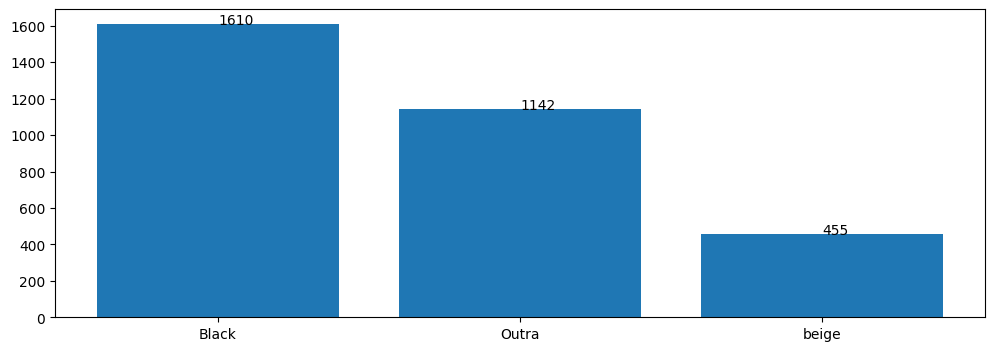

In [58]:
# Obter os 5 valores mais frequentes

int_col = df_mod['int_col_mod'].value_counts()[:3]

# Criar um gráfico de barras
plt.figure(figsize=(12, 4))
plt.bar(int_col.index, int_col)

for i in range(len(int_col)):
    plt.annotate(str(int_col[i]), (int_col.index[i], int_col[i]))

plt.show()

In [59]:
df_mod['ext_col_mod'] = np.where(df_mod['ext_col'].str.contains(r'\bblack\b', case=False), 'black', df_mod['ext_col'])
df_mod['ext_col_mod'] = np.where(df_mod['ext_col'].str.contains(r'\bwhite\b', case=False), 'white', df_mod['ext_col'])

top_two = df_mod['ext_col_mod'].value_counts().index[:2]
df_mod['ext_col_mod'] = df_mod['ext_col_mod'].apply(lambda x: "Outra" if x not in top_two else x)


C:\Users\gonca\AppData\Local\Temp\ipykernel_15492\3383942021.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(str(int_col[i]), (int_col.index[i], int_col[i]))


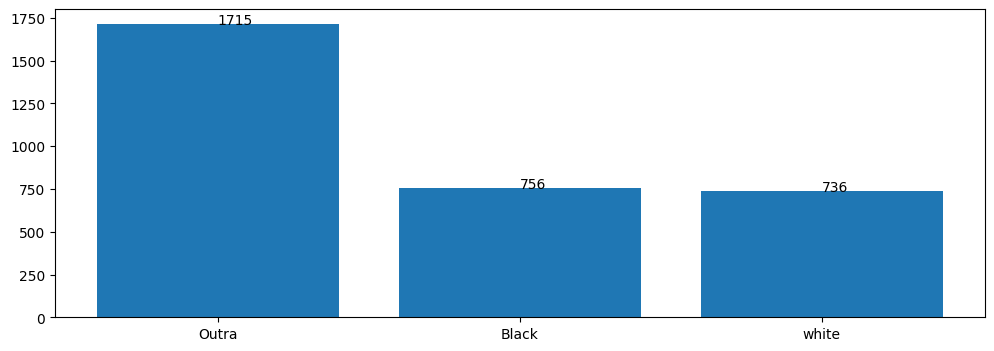

In [60]:
# Obter os 5 valores mais frequentes

int_col = df_mod['ext_col_mod'].value_counts()[:4]

# Criar um gráfico de barras
plt.figure(figsize=(12, 4))
plt.bar(int_col.index, int_col)

for i in range(len(int_col)):
    plt.annotate(str(int_col[i]), (int_col.index[i], int_col[i]))

plt.show()

In [61]:
# Substituir linhas nulas por 'None'
df_mod['accident_mod'] = df_mod['accident'].fillna('None reported')

C:\Users\gonca\AppData\Local\Temp\ipykernel_15492\1876359527.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(str(accident[i]), (accident.index[i], accident[i]))


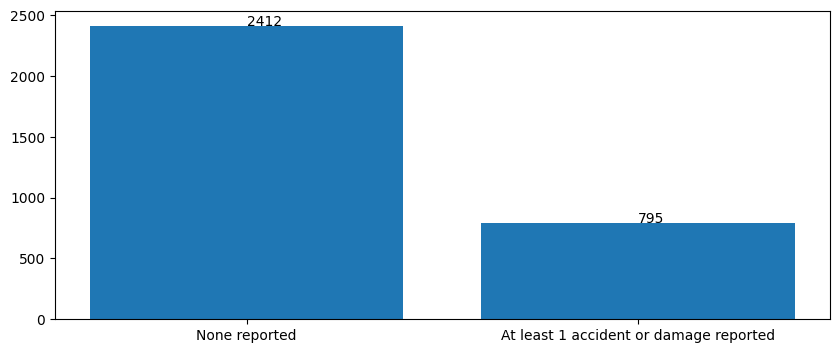

In [62]:
accident = df_mod['accident_mod'].value_counts()[:4]

# Criar um gráfico de barras
plt.figure(figsize=(10, 4))
plt.bar(accident.index, accident)

for i in range(len(accident)):
    plt.annotate(str(accident[i]), (accident.index[i], accident[i]))

plt.show()

In [63]:
df_mod['clean_title_mod'] = df_mod['clean_title'].fillna('No')

C:\Users\gonca\AppData\Local\Temp\ipykernel_15492\2535900739.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(str(accident[i]), (accident.index[i], accident[i]))


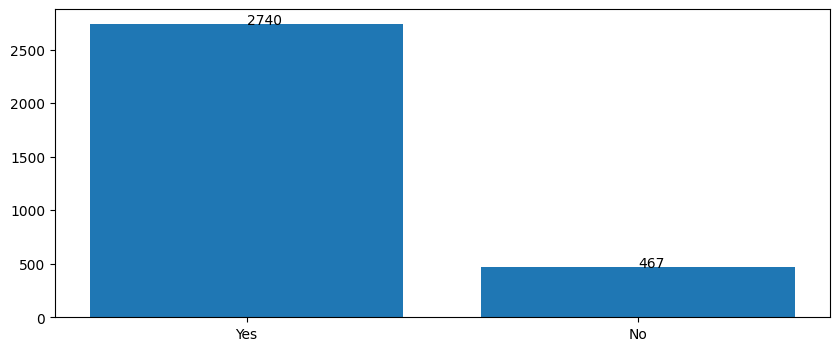

In [64]:
accident = df_mod['clean_title_mod'].value_counts()[:4]

# Criar um gráfico de barras
plt.figure(figsize=(10, 4))
plt.bar(accident.index, accident)

for i in range(len(accident)):
    plt.annotate(str(accident[i]), (accident.index[i], accident[i]))

plt.show()

In [65]:
# 1 dólar corresponde a 0.91 euros
taxa_de_cambio = 0.91

# Converter a coluna 'price' para euros
df_mod['price_eur'] = (df_mod['price'] * taxa_de_cambio).round().astype(int)

# Exibir as primeiras linhas do DataFrame com a nova coluna
print(df_mod[['price', 'price_eur']].head())

   price  price_eur
0  22000      20020
1  26000      23660
2  23995      21835
3  34000      30940
4  38095      34666


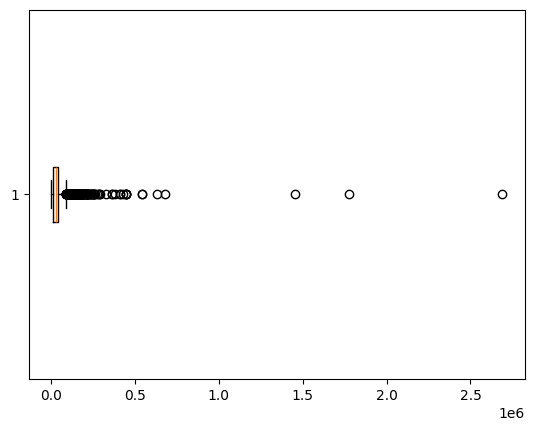

In [66]:
plt.boxplot(df_mod['price_eur'], vert=False)

plt.show()

In [67]:
df_mod.head()

,brand,Brand_Mod,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,...,fuel,HP,Litros,Cilindros,transmission_mod,int_col_mod,ext_col_mod,accident_mod,clean_title_mod,price_eur
0,Jeep,Outra,Wrangler Sport,2014,71000,Gasoline,5-Speed A/T,Gray,Black,None reported,...,Gasoline,285,3.6,6,Automatic,Black,Outra,None reported,Yes,20020
1,Toyota,Outra,Highlander XLE,2015,68575,Gasoline,A/T,Silver,Gray,At least 1 accident or damage reported,...,Gasoline,270,3.5,6,Automatic,Outra,Outra,At least 1 accident or damage reported,Yes,23660
2,Toyota,Outra,Camry Hybrid XLE,2018,69641,Hybrid,CVT Transmission,White,Black,At least 1 accident or damage reported,...,Hybrid,208,2.5,4,CVT,Black,white,At least 1 accident or damage reported,Yes,21835
3,Subaru,Outra,Outback Touring XT,2021,33500,Gasoline,CVT Transmission,Blue,Brown,None reported,...,Gasoline,260,2.4,4,CVT,Outra,Outra,None reported,Yes,30940
4,Lexus,Outra,GX 460 Base,2018,75000,Gasoline,6-Speed A/T,White,Beige,At least 1 accident or damage reported,...,Gasoline,301,4.6,8,Automatic,beige,white,At least 1 accident or damage reported,Yes,34666


In [68]:
df_final = df_mod[["Brand_Mod", "model", "model_year", "KM", "fuel", "HP", "Litros", "Cilindros", "transmission_mod", "ext_col_mod", "int_col_mod", "accident_mod", "clean_title_mod", "price_eur"]]

In [69]:
df_final.head()

,Brand_Mod,model,model_year,KM,fuel,HP,Litros,Cilindros,transmission_mod,ext_col_mod,int_col_mod,accident_mod,clean_title_mod,price_eur
0,Outra,Wrangler Sport,2014,114263,Gasoline,285,3.6,6,Automatic,Outra,Black,None reported,Yes,20020
1,Outra,Highlander XLE,2015,110361,Gasoline,270,3.5,6,Automatic,Outra,Outra,At least 1 accident or damage reported,Yes,23660
2,Outra,Camry Hybrid XLE,2018,112076,Hybrid,208,2.5,4,CVT,white,Black,At least 1 accident or damage reported,Yes,21835
3,Outra,Outback Touring XT,2021,53913,Gasoline,260,2.4,4,CVT,Outra,Outra,None reported,Yes,30940
4,Outra,GX 460 Base,2018,120701,Gasoline,301,4.6,8,Automatic,white,beige,At least 1 accident or damage reported,Yes,34666


In [70]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand_Mod         3207 non-null   object 
 1   model             3207 non-null   object 
 2   model_year        3207 non-null   int64  
 3   KM                3207 non-null   int32  
 4   fuel              3207 non-null   object 
 5   HP                2578 non-null   Int64  
 6   Litros            2891 non-null   float64
 7   Cilindros         2705 non-null   Int64  
 8   transmission_mod  3207 non-null   object 
 9   ext_col_mod       3207 non-null   object 
 10  int_col_mod       3207 non-null   object 
 11  accident_mod      3207 non-null   object 
 12  clean_title_mod   3207 non-null   object 
 13  price_eur         3207 non-null   int32  
dtypes: Int64(2), float64(1), int32(2), int64(1), object(8)
memory usage: 332.1+ KB


In [71]:
df_final.to_csv("cenario1_engine.csv", index=False)

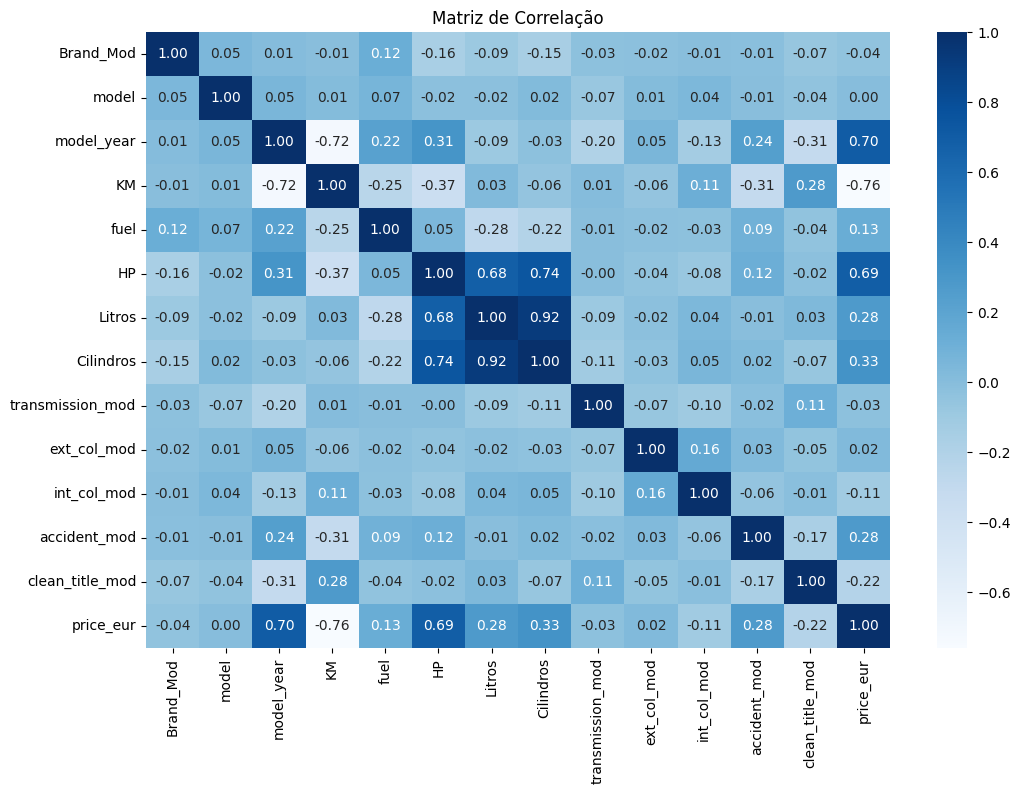

In [3]:
# Seleciona apenas as colunas não numéricas
categorical_columns = df_final.select_dtypes(include='object').columns

# Mapeia as categorias para números
for column in categorical_columns:
    df_final[column] = df_final[column].astype('category').cat.codes

# Calcule a matriz de correlação de Spearman
correlation_matrix = df_final.corr(method='spearman')

# Visualize a matriz de correlação usando um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()